# Blackjack: Entropy Reduction Visualization Across Player Strategies

This notebook simulates the entropy reduction in Blackjack for a standard 52-card deck, focusing on deck entropy as cards are dealt. We model different player strategies (Basic Strategy, Hi-Lo Counter, KO Counter, Hi-Opt II Counter, Team Player) to show how knowledge entropy and deck entropy evolve. The process is akin to Lambda Calculus state reduction, where each dealt card filters the state space, reducing uncertainty. We visualize the deck entropy decrease over cards dealt for a general case and discuss knowledge entropy for each strategy.

## Problem Setup
- **Deck**: 52 cards, 13 ranks (Ace to King), 4 suits each, but gameplay focuses on 13 values (suits irrelevant).
- **Deck Entropy**: Initial entropy based on 13 values, log₂(13) ≈ 3.7 bits per value draw, adjusted as cards are dealt.
- **Knowledge Entropy**: Varies by player strategy, from 0 bits (Basic Strategy, no tracking) to higher values for card counters (e.g., log₂(53) ≈ 5.73 bits for Hi-Lo).
- **Goal**: Show how deck entropy decreases as cards are dealt (simulating a game round) and compare static knowledge entropy across strategies.
- **Lambda Calculus Model**: Deck as a state list of possible cards/values, dealing as state reduction, entropy as log₂ of remaining possibilities or based on probabilities.

We use Python to simulate deck depletion and plot entropy over cards dealt, assuming balanced depletion for simplicity.

In [12]:
import math
import numpy as np
import matplotlib.pyplot as plt
from typing import List, Dict

# Initialize the deck with 52 cards, 13 ranks, 4 suits each (focus on ranks for entropy)
def initialize_deck() -> Dict[str, int]:
    ranks = ['A', '2', '3', '4', '5', '6', '7', '8', '9', '10', 'J', 'Q', 'K']
    return {rank: 4 for rank in ranks}  # 4 cards per rank

# Calculate deck entropy based on remaining cards per rank
def calculate_deck_entropy(deck: Dict[str, int]) -> float:
    total_cards = sum(deck.values())
    if total_cards == 0:
        return 0.0
    probabilities = [count / total_cards for count in deck.values() if count > 0]
    if not probabilities:
        return 0.0
    return -sum(p * math.log2(p) for p in probabilities if p > 0)

# Simulate dealing a card (random rank for balanced depletion assumption)
def deal_card(deck: Dict[str, int], rank: str = None) -> Dict[str, int]:
    if sum(deck.values()) == 0:
        return deck
    if rank is None:
        # Choose a random rank with remaining cards for simplicity
        available_ranks = [r for r, count in deck.items() if count > 0]
        if not available_ranks:
            return deck
        rank = np.random.choice(available_ranks)
    if deck[rank] > 0:
        deck[rank] -= 1
    return deck

# Display deck state and entropy at each step
def display_deck_state(deck: Dict[str, int], step: int):
    total_cards = sum(deck.values())
    print(f'Step {step} (Cards Dealt: {52 - total_cards}):')
    print(f'  Remaining cards: {total_cards}')
    print(f'  Deck Entropy: {calculate_deck_entropy(deck):.3f} bits')
    if total_cards <= 5:  # Show details only for small decks
        print(f'  Remaining deck: {deck}')
    print()

## Simulation of Deck Entropy Reduction

We'll simulate dealing cards from a 52-card deck to observe deck entropy reduction:
- Start with 52 cards, 13 ranks, entropy based on rank probabilities (initially log₂(13) ≈ 3.7 bits per draw).
- Deal cards one by one, assuming balanced depletion (random rank selection for simplicity).
- Track entropy after each deal, simulating a game round (e.g., 20 cards dealt for multiple hands).

This represents the general uncertainty reduction as the deck depletes, applicable to all player strategies. Knowledge entropy for each strategy is static and will be discussed separately.

In [13]:
# Initialize deck
deck = initialize_deck()
display_deck_state(deck, 0)

# Store entropy values for plotting
deck_entropies = [calculate_deck_entropy(deck)]
decks = [deck.copy()]

# Simulate dealing 20 cards (approximate for a few hands in Blackjack)
num_cards_to_deal = 20
for step in range(1, num_cards_to_deal + 1):
    deck = deal_card(deck)
    decks.append(deck.copy())
    deck_entropies.append(calculate_deck_entropy(deck))
    display_deck_state(deck, step)
    if sum(deck.values()) == 0:
        break

Step 0 (Cards Dealt: 0):
  Remaining cards: 52
  Deck Entropy: 3.700 bits

Step 1 (Cards Dealt: 1):
  Remaining cards: 51
  Deck Entropy: 3.697 bits

Step 2 (Cards Dealt: 2):
  Remaining cards: 50
  Deck Entropy: 3.694 bits

Step 3 (Cards Dealt: 3):
  Remaining cards: 49
  Deck Entropy: 3.691 bits

Step 4 (Cards Dealt: 4):
  Remaining cards: 48
  Deck Entropy: 3.689 bits

Step 5 (Cards Dealt: 5):
  Remaining cards: 47
  Deck Entropy: 3.687 bits

Step 6 (Cards Dealt: 6):
  Remaining cards: 46
  Deck Entropy: 3.675 bits

Step 7 (Cards Dealt: 7):
  Remaining cards: 45
  Deck Entropy: 3.675 bits

Step 8 (Cards Dealt: 8):
  Remaining cards: 44
  Deck Entropy: 3.664 bits

Step 9 (Cards Dealt: 9):
  Remaining cards: 43
  Deck Entropy: 3.653 bits

Step 10 (Cards Dealt: 10):
  Remaining cards: 42
  Deck Entropy: 3.624 bits

Step 11 (Cards Dealt: 11):
  Remaining cards: 41
  Deck Entropy: 3.625 bits

Step 12 (Cards Dealt: 12):
  Remaining cards: 40
  Deck Entropy: 3.628 bits

Step 13 (Cards Deal

## Player Strategies and Knowledge Entropy

In Blackjack, different player strategies handle unknowns differently, leading to varying knowledge entropy ($H(K)$). Deck entropy ($H(D)$) is the same for all, decreasing as cards are dealt. Knowledge entropy is static, based on the information tracked by each strategy:

- **Basic Strategy Player**: No tracking, $H(K) = 0$ bits (no uncertainty in knowledge, as they know nothing beyond rules).
- **Hi-Lo Counter**: Tracks running count (-26 to +26), $H(K) = \log_2(53) \approx 5.73$ bits.
- **KO Counter**: Tracks running count (-13 to +13), $H(K) = \log_2(27) \approx 4.75$ bits.
- **Hi-Opt II Counter**: Tracks detailed count (-26 to +26 range), $H(K) = \log_2(53) \approx 5.73$ bits.
- **Team Player**: Relies on signals (e.g., low, medium, high), $H(K) = \log_2(3) \approx 1.585$ bits.

Below, we plot the deck entropy reduction over dealt cards and overlay static knowledge entropy lines for comparison in four different visualizations.

In [14]:
# Define steps as number of cards dealt (0 to num_cards_to_deal)
steps = np.array(range(len(deck_entropies)))

# Define theta for polar plots
theta = steps * (np.pi / 2) * (3 / max(steps) if max(steps) > 0 else 1)  # Scale to radians (0 to 3π/2)

# Define r as deck entropy values
r = deck_entropies

# Define knowledge entropies for each strategy (static)
basic_k_entropy = 0.0
hilo_k_entropy = math.log2(53)  # Approx 5.73 bits
ko_k_entropy = math.log2(27)    # Approx 4.75 bits
hiopt_k_entropy = math.log2(53) # Approx 5.73 bits
team_k_entropy = math.log2(3)   # Approx 1.585 bits

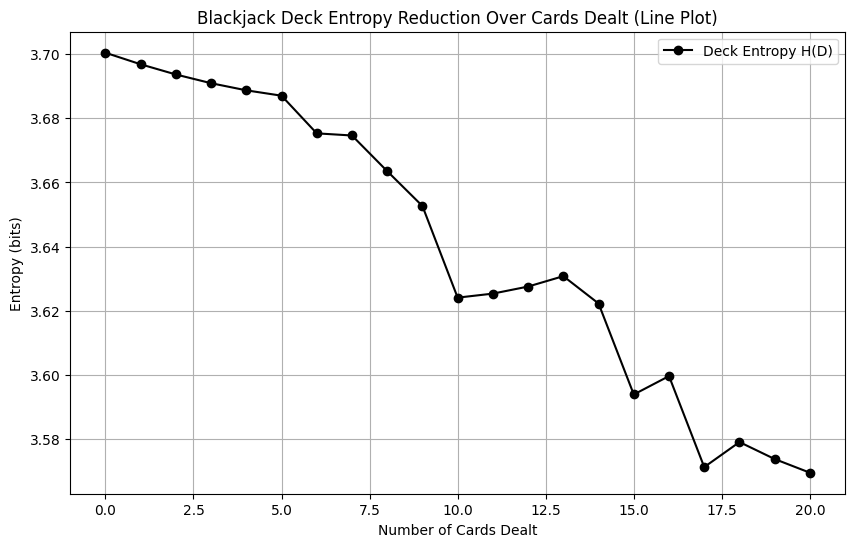

<Figure size 640x480 with 0 Axes>

In [15]:
# Line Plot for Deck Entropy Only
plt.figure(figsize=(10, 6))
plt.plot(steps, deck_entropies, "o-", label="Deck Entropy H(D)", color="black")
plt.title("Blackjack Deck Entropy Reduction Over Cards Dealt (Line Plot)")
plt.xlabel("Number of Cards Dealt")
plt.ylabel("Entropy (bits)")
plt.legend()
plt.grid(True)
plt.show()
plt.savefig("../images/graphs/blackjack_deck_entropy_line_plot.png")

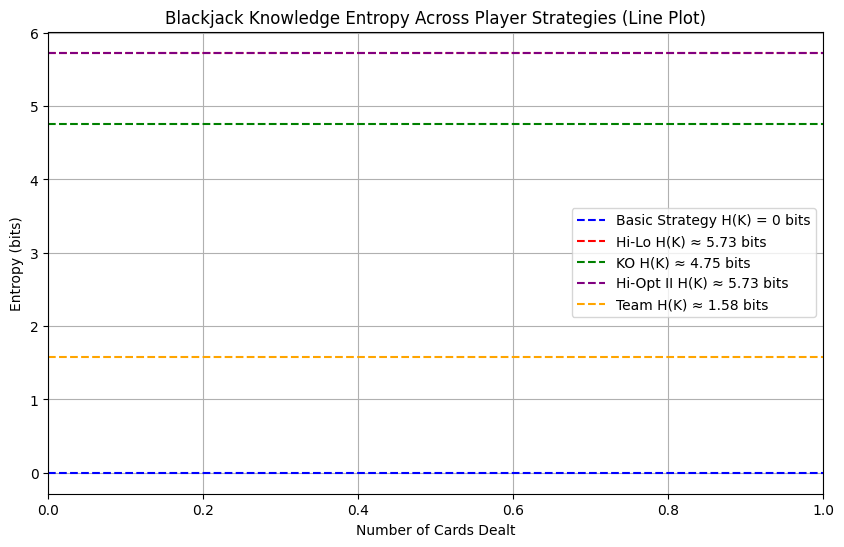

<Figure size 640x480 with 0 Axes>

In [16]:
# Line Plot for Knowledge Entropy Across Strategies
plt.figure(figsize=(10, 6))
plt.axhline(y=basic_k_entropy, color="blue", linestyle="--", label="Basic Strategy H(K) = 0 bits")
plt.axhline(y=hilo_k_entropy, color="red", linestyle="--", label=f"Hi-Lo H(K) ≈ {hilo_k_entropy:.2f} bits")
plt.axhline(y=ko_k_entropy, color="green", linestyle="--", label=f"KO H(K) ≈ {ko_k_entropy:.2f} bits")
plt.axhline(y=hiopt_k_entropy, color="purple", linestyle="--", label=f"Hi-Opt II H(K) ≈ {hiopt_k_entropy:.2f} bits")
plt.axhline(y=team_k_entropy, color="orange", linestyle="--", label=f"Team H(K) ≈ {team_k_entropy:.2f} bits")
plt.title("Blackjack Knowledge Entropy Across Player Strategies (Line Plot)")
plt.xlabel("Number of Cards Dealt")
plt.ylabel("Entropy (bits)")
plt.legend()
plt.grid(True)
plt.show()
plt.savefig("../images/graphs/blackjack_knowledge_entropy_line_plot.png")

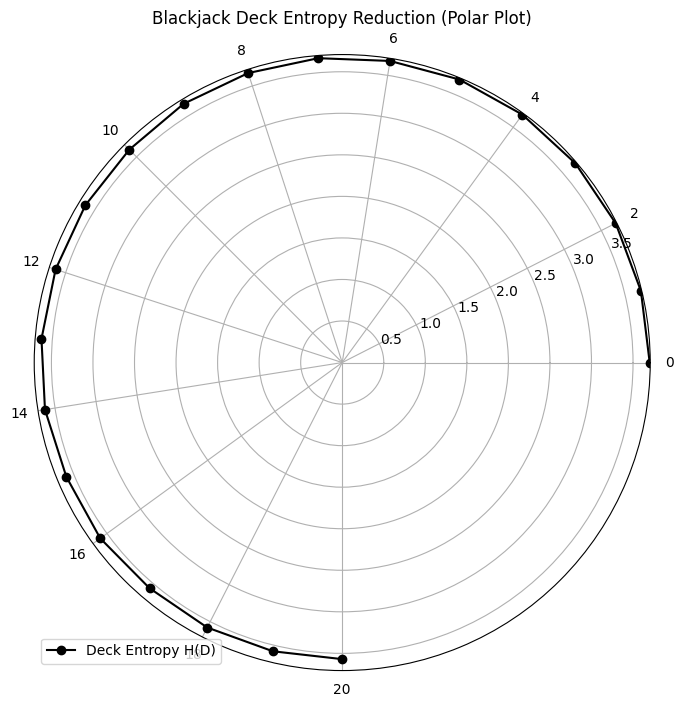

<Figure size 640x480 with 0 Axes>

In [17]:
# Polar Plot for Deck Entropy Only
fig, ax = plt.subplots(subplot_kw={"projection": "polar"}, figsize=(8, 8))
ax.plot(theta, r, "o-", label="Deck Entropy H(D)", color="black")
ax.set_title("Blackjack Deck Entropy Reduction (Polar Plot)")
ax.set_xticks(theta[::2])  # Label every other step to avoid clutter
ax.set_xticklabels([str(i) for i in steps[::2]])  # Label as cards dealt
ax.legend()
plt.show()
plt.savefig("../images/graphs/blackjack_deck_entropy_polar_plot.png")

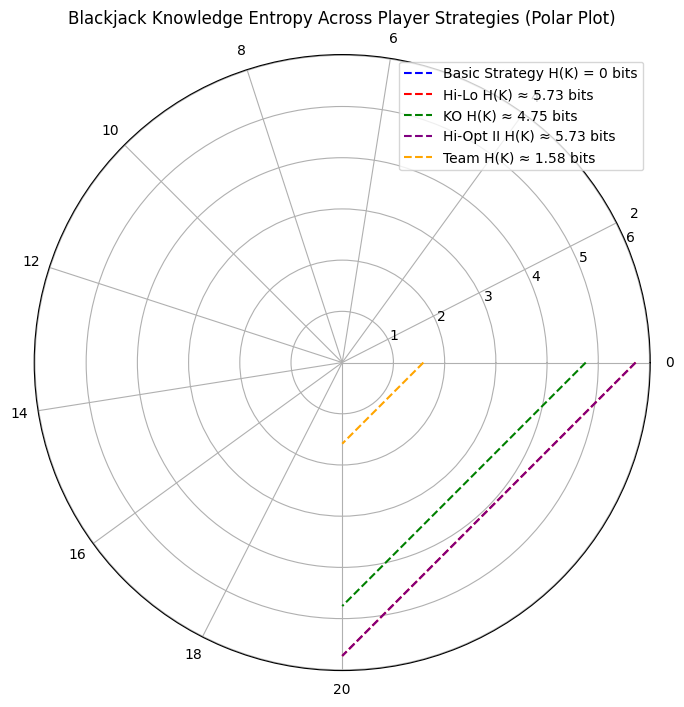

<Figure size 640x480 with 0 Axes>

In [18]:
# Polar Plot for Knowledge Entropy Across Strategies
# Since knowledge entropy is static, theta is not directly tied to cards dealt, but we use the same scale for consistency
fig, ax = plt.subplots(subplot_kw={"projection": "polar"}, figsize=(8, 8))
# Plot static lines as points at max theta for visibility across the plot
max_theta = theta[-1] if len(theta) > 0 else np.pi * 1.5
ax.plot([0, max_theta], [basic_k_entropy, basic_k_entropy], "--", label="Basic Strategy H(K) = 0 bits", color="blue")
ax.plot([0, max_theta], [hilo_k_entropy, hilo_k_entropy], "--", label=f"Hi-Lo H(K) ≈ {hilo_k_entropy:.2f} bits", color="red")
ax.plot([0, max_theta], [ko_k_entropy, ko_k_entropy], "--", label=f"KO H(K) ≈ {ko_k_entropy:.2f} bits", color="green")
ax.plot([0, max_theta], [hiopt_k_entropy, hiopt_k_entropy], "--", label=f"Hi-Opt II H(K) ≈ {hiopt_k_entropy:.2f} bits", color="purple")
ax.plot([0, max_theta], [team_k_entropy, team_k_entropy], "--", label=f"Team H(K) ≈ {team_k_entropy:.2f} bits", color="orange")
ax.set_title("Blackjack Knowledge Entropy Across Player Strategies (Polar Plot)")
ax.set_xticks(theta[::2])  # Label every other step for consistency
ax.set_xticklabels([str(i) for i in steps[::2]])  # Label as cards dealt for consistency
ax.legend()
plt.show()
plt.savefig("../images/graphs/blackjack_knowledge_entropy_polar_plot.png")

## Interpretation
- **Deck Entropy ($H(D)$)**: Decreases as cards are dealt, reflecting reduced uncertainty about remaining cards. Initially ≈ 3.7 bits (log₂(13)), it drops as the deck depletes, though not linearly due to rank-based probabilities. This is shown in both the line and polar plots for deck entropy, where the polar plot emphasizes area reduction as problem space partitioning.
- **Knowledge Entropy ($H(K)$)**: Static for each strategy, representing uncertainty in the player's tracked information (e.g., count values or signals). Card counters have higher $H(K)$ due to more complex state tracking, while Basic Strategy has none. This is visualized in both line and polar plots for knowledge entropy, with the polar plot providing a radial perspective on static values.
These four visualizations (line and polar for both deck and knowledge entropy) show how deck entropy reduces universally over the same scenario, while player knowledge entropy reflects strategy complexity, aligning with the computational model of state reduction in Lambda Calculus.